In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')

In [3]:
templist = ['cutout1.jpg']
            #, 'cutout2.jpg', 'cutout3.jpg',
            #'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

In [4]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
        
    for coordinates in bboxes:
        point1, point2 = coordinates
        cv2.rectangle(imcopy, point1, point2, color, thick)
        
    # Return the image copy with boxes drawn
    return imcopy

In [5]:
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    img_copy = np.copy(img)
    
    method = cv2.TM_SQDIFF
    # Define an empty list to take bbox coords
    bbox_list = []
    # Iterate through template list
    for template in template_list:
        template_img = plt.imread(template)
        h, w = template_img.shape[0], template_img.shape[1]
        res = cv2.matchTemplate(img_copy, template_img, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = min_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        bbox_list.append((top_left, bottom_right))    
    
    return bbox_list

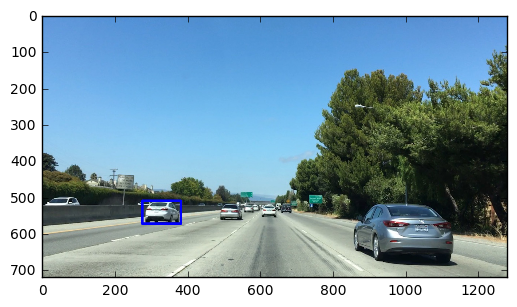

In [6]:
bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)